# Imports

In [3]:
from pycbc import distributions
from pycbc.waveform import get_td_waveform
import matplotlib.pyplot as plt
import numpy as np
import pylab
from tqdm.notebook import tqdm
from gwpy.timeseries import TimeSeries
import pandas as pd
import os
import csv
from gwosc.datasets import event_gps
from gwpy.timeseries import TimeSeries
from pycbc.catalog import Merger
import pylab
from pycbc.filter import resample_to_delta_t, highpass
import pycbc.psd
import pycbc.noise

In [4]:
directory = "/home/hrishi/SOP/Gravitational Wave Detection Using Deep Learning/LIGO Detector Data/"

# BBH Merger Strain Data Download

In [3]:
bbh_events = ['GW150914',
              'GW151012',
              'GW151226',
              'GW170104',
              'GW170608',
              'GW170729',
              'GW170809',
              'GW170814',
              'GW170818',
              'GW170823',
              'GW190408_181802',
              'GW190412',              
              'GW190413_052954',
              'GW190413_134308',
              'GW190421_213856',
              'GW190424_180648',
              'GW190425',
              'GW190503_185404',
              'GW190512_180714',
              'GW190513_205428',
              'GW190514_065416',
              'GW190517_055101',
              'GW190519_153544',
              'GW190521',
              'GW190521_074359',
              'GW190527_092055',
              'GW190602_175927',
              'GW190620_030421',
              'GW190630_185205',
              'GW190701_203306',
              'GW190706_222641',
              'GW190707_093326',
              'GW190708_232457',
              'GW190719_215514',
              'GW190720_000836',
              'GW190727_060333',
              'GW190728_064510',
              'GW190731_140936',
              'GW190803_022701',
              'GW190814',
              'GW190828_063405',
              'GW190828_065509',
              'GW190909_114149',
              'GW190910_112807',
              'GW190915_235702',
              'GW190924_021846',
              'GW190929_012149',
              'GW190930_133541']

In [4]:
# Code to fetch strain data from GWOSC server

for i in tqdm(range(len(bbh_events))):

    gps = event_gps(bbh_events[i])
    start = int(gps) - 15
    end = int(gps) + 15

    data = TimeSeries.fetch_open_data('L1', start, end)

    data.write(directory + "BBH mergers/Original signals/"+bbh_events[i]+".txt")    

  0%|          | 0/48 [00:00<?, ?it/s]

In [ ]:
# Merging Original Strain Data Templates into single file

path = directory + "BBH mergers/Original signals/"
files= os.listdir(path)
f = open(directory + 'BBH mergers/Original_BBH_Merged.csv', 'w')
cw = csv.writer(f)

for i in tqdm(files):
    df = pd.read_csv(path+i,sep = ' ', header=None)
    c = df[:][1]
    cw.writerow(c)
f.close()

In [ ]:
# Processed strain data

for i in tqdm(range(len(bbh_events))):
    gps = event_gps(bbh_events[i])
    
    data = TimeSeries.read(directory + "BBH mergers/Original signals/"+bbh_events[i]+".txt")    
    data = TimeSeries.to_pycbc(data)
    data = data.whiten(4, 4)
    data = data.highpass_fir(30, 512).lowpass_fir(250, 512)
    data = data.time_slice(gps - 2, gps + 2)
    
    data = TimeSeries.from_pycbc(data)
    data.write(directory + "BBH mergers/Processed signals/"+bbh_events[i]+".txt")    
    

In [10]:
# Merging Processed Strain Data Templates into single file

path = directory + "BBH mergers/Processed signals/"
files= os.listdir(path)
f = open(directory + 'BBH mergers/Processed_BBH_Merged.csv', 'w')
cw = csv.writer(f)

for i in tqdm(files):
    df = pd.read_csv(path+i,sep = ' ', header=None)
    c = df[:][1]
    cw.writerow(c)
f.close()

  0%|          | 0/48 [00:00<?, ?it/s]

In [11]:
# Another way of processing the strain data
# Scaled Processed strain data

for i in tqdm(range(len(bbh_events))):
    gps = event_gps(bbh_events[i])
    
    data = TimeSeries.read(directory + "BBH mergers/Original signals/"+bbh_events[i]+".txt")    
    data = TimeSeries.to_pycbc(data)
    data = data.whiten(4, 4)
    data = data.highpass_fir(30, 512).lowpass_fir(250, 512)
    data = data.time_slice(gps - 2, gps + 2)
    
    data = TimeSeries.from_pycbc(data)
    data = (data/(max(data.max(), np.abs(data.min()))))*1.25
    data *= 0.4
    data *= 1e-17

    data.write(directory + "BBH mergers/Scaled Processed signals/"+bbh_events[i]+".txt")    
    

  0%|          | 0/48 [00:00<?, ?it/s]

In [12]:
# Merging Scaled Processed Strain Data Templates into single file

path = directory + "BBH mergers/Scaled Processed signals/"
files= os.listdir(path)
f = open(directory + 'BBH mergers/Scaled_Processed_BBH_Merged.csv', 'w')
cw = csv.writer(f)

for i in tqdm(files):
    df = pd.read_csv(path+i,sep = ' ', header=None)
    c = df[:][1]
    cw.writerow(c)
f.close()

  0%|          | 0/48 [00:00<?, ?it/s]

In [14]:
# Another way of processing the strain data
## Scaled Sliced strain data

for i in tqdm(range(len(bbh_events))):
    gps = event_gps(bbh_events[i])
    
    data = TimeSeries.read(directory + "BBH mergers/Original signals/"+bbh_events[i]+".txt")    
    data = TimeSeries.to_pycbc(data)
    data = data.time_slice(gps - 2, gps + 2)
    
    data = TimeSeries.from_pycbc(data)
    data = (data/(max(data.max(), np.abs(data.min()))))*1.25
    data *= 0.4
    data *= 1e-17

    data.write(directory + "BBH mergers/Scaled Sliced signals/"+bbh_events[i]+".txt")    
    

  0%|          | 0/48 [00:00<?, ?it/s]

In [15]:
# Merging Scaled Sliced Strain Data Templates into single file

path = directory + "BBH mergers/Scaled Sliced signals/"
files= os.listdir(path)
f = open(directory + 'BBH mergers/Scaled_Sliced_BBH_Merged.csv', 'w')
cw = csv.writer(f)

for i in tqdm(files):
    df = pd.read_csv(path+i,sep = ' ', header=None)
    c = df[:][1]
    cw.writerow(c)
f.close()

  0%|          | 0/48 [00:00<?, ?it/s]

In [ ]:
# # Test data for hidden, not whitened, test 6, rescaled 0.2

# for i in tqdm(range(len(bbh_events))):

#     gps = event_gps(bbh_events[i])

#     data = TimeSeries.read(directory + "BBH mergers/Original signals/"+bbh_events[i]+".txt")    

#     if bbh_events[i] == 'GW190424_180648':
#         data.write(directory + "BBH mergers/Processed signals/"+bbh_events[i]+".txt")    
#         continue
    
#     data = TimeSeries.to_pycbc(data)

#     # data = resample_to_delta_t(highpass(data, 15.0), 1.0/4096)

#     # data = data.whiten(4, 4)
#     # data = data.highpass_fir(30, 512).lowpass_fir(250, 512)
    
#     data = data.time_slice(gps - 2, gps + 2)
#     data.plot()
    
#     data = TimeSeries.from_pycbc(data)
#     # print(data.sample_rate)

#     # data.write(directory + "BBH mergers/Processed signals/"+bbh_events[i]+".txt")    
    

# Visualization

4096.0 Hz


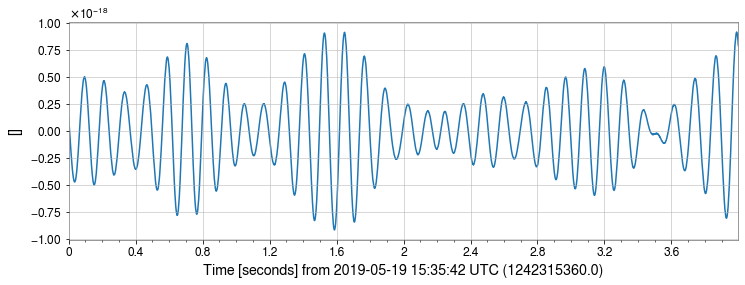

In [12]:
# Visualization of the Original Strain Data
# Duration of the data is 4s, i.e. a 2s interval around the merger

gps = event_gps("GW190519_153544")
start = int(gps) - 2
end = int(gps) + 2
data = TimeSeries.fetch_open_data('L1', start, end)
data.plot()
print(data.sample_rate)

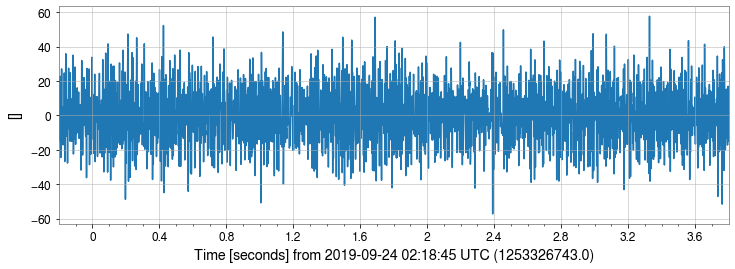

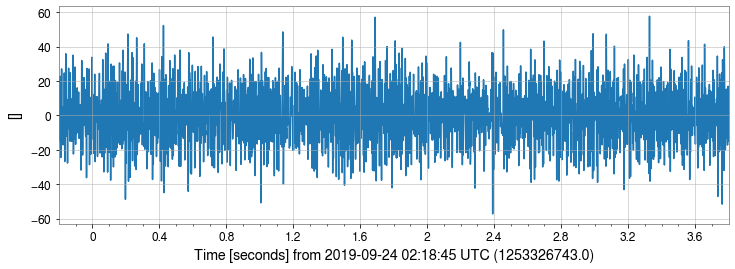

In [12]:
# Visualization of the Processed Strain Data
# Duration of the data is 4s, i.e. a 2s interval around the merger

i = 45
data = TimeSeries.read(directory + "BBH mergers/Processed signals/"+bbh_events[i]+".txt")
data.plot()

In [64]:
# for i in tqdm(range(len(bbh_events))):

    # gps = event_gps(bbh_events[i])
    # start = int(gps) - 2
    # end = int(gps) + 2

    # data = TimeSeries.fetch_open_data('L1', start, end)
#     data.write("/home/hrishi/SOP/Gravitational Wave Detection Using Deep Learning/LIGO Detector Data/BBH mergers/Original signals/"+bbh_events[i]+".txt")    

In [ ]:
# for i in tqdm(range(len(bbh_events))):

#     m = Merger(bbh_events[i])
#     data = m.strain('L1')

#     data1 = TimeSeries.from_pycbc(data)
#     data1.write("/home/hrishi/SOP/Gravitational Wave Detection Using Deep Learning/LIGO Detector Data/BBH mergers/Original signals/"+bbh_events[i]+".txt")    

#     data = data.whiten(4, 4)
#     data = data.highpass_fir(30, 512).lowpass_fir(250, 512)
#     data = data.time_slice(m.time - 2, m.time + 2)
#     data = TimeSeries.from_pycbc(data)
    
#     data.write("/home/hrishi/SOP/Gravitational Wave Detection Using Deep Learning/LIGO Detector Data/BBH mergers/Processed signals/"+bbh_events[i]+".txt")    
    

In [ ]:
# # Alternate

# # As an example we use the GW150914 data
# import pylab
# from pycbc.catalog import Merger
# from pycbc.filter import resample_to_delta_t, highpass

# merger = Merger("GW150914")

# # Get the data from the Hanford detector
# strain = merger.strain('H1')

# # Remove the low frequency content and downsample the data to 2048Hz
# strain = resample_to_delta_t(highpass(strain, 15.0), 1.0/4096)
# strain = strain.time_slice(merger.time - 2, merger.time + 2)

# data = TimeSeries.from_pycbc(strain)
# data.plot()
# print()

# # pylab.plot(strain.sample_times, strain)
# # pylab.xlabel('Time (s)')
# # pylab.show()

In [ ]:
########################################################
########### BNS Merger Strain Data Download ############
########################################################

# BNS Merger Strain Data Download

In [1]:
bns_events = ['GW170817', 'GW190425']

In [5]:
# Code to fetch strain data from GWOSC server

for i in tqdm(range(len(bns_events))):

    gps = event_gps(bns_events[i])
    start = int(gps) - 15
    end = int(gps) + 15

    data = TimeSeries.fetch_open_data('L1', start, end)

    data.write(directory + "BNS mergers/Original signals/"+bns_events[i]+".txt")    

  0%|          | 0/2 [00:00<?, ?it/s]

In [6]:
# Merging Original Strain Data Templates into single file

path = directory + "BNS mergers/Original signals/"
files= os.listdir(path)
f = open(directory + 'BNS mergers/Original_BNS_Merged.csv', 'w')
cw = csv.writer(f)

for i in tqdm(files):
    df = pd.read_csv(path+i,sep = ' ', header=None)
    c = df[:][1]
    cw.writerow(c)
f.close()

  0%|          | 0/2 [00:00<?, ?it/s]

In [7]:
# Processed strain data

for i in tqdm(range(len(bns_events))):
    gps = event_gps(bns_events[i])
    
    data = TimeSeries.read(directory + "BNS mergers/Original signals/"+bns_events[i]+".txt")    
    data = TimeSeries.to_pycbc(data)
    data = data.whiten(4, 4)
    data = data.highpass_fir(30, 512).lowpass_fir(250, 512)
    data = data.time_slice(gps - 2, gps + 2)
    
    data = TimeSeries.from_pycbc(data)
    data.write(directory + "BNS mergers/Processed signals/"+bns_events[i]+".txt")    
    

  0%|          | 0/2 [00:00<?, ?it/s]

In [8]:
# Merging Processed Strain Data Templates into single file

path = directory + "BNS mergers/Processed signals/"
files= os.listdir(path)
f = open(directory + 'BNS mergers/Processed_BNS_Merged.csv', 'w')
cw = csv.writer(f)

for i in tqdm(files):
    df = pd.read_csv(path+i,sep = ' ', header=None)
    c = df[:][1]
    cw.writerow(c)
f.close()

  0%|          | 0/2 [00:00<?, ?it/s]

In [9]:
# Another way of processing the strain data
# Scaled Processed strain data

for i in tqdm(range(len(bns_events))):
    gps = event_gps(bns_events[i])
    
    data = TimeSeries.read(directory + "BNS mergers/Original signals/"+bns_events[i]+".txt")    
    data = TimeSeries.to_pycbc(data)
    data = data.whiten(4, 4)
    data = data.highpass_fir(30, 512).lowpass_fir(250, 512)
    data = data.time_slice(gps - 2, gps + 2)
    
    data = TimeSeries.from_pycbc(data)
    data = (data/(max(data.max(), np.abs(data.min()))))*1.25
    data *= 0.4
    data *= 1e-17

    data.write(directory + "BNS mergers/Scaled Processed signals/"+bns_events[i]+".txt")    
    

  0%|          | 0/2 [00:00<?, ?it/s]

In [12]:
# Merging Scaled Processed Strain Data Templates into single file

path = directory + "BNS mergers/Scaled Processed signals/"
files= os.listdir(path)
f = open(directory + 'BNS mergers/Scaled_Processed_BNS_Merged.csv', 'w')
cw = csv.writer(f)

for i in tqdm(files):
    df = pd.read_csv(path+i,sep = ' ', header=None)
    c = df[:][1]
    cw.writerow(c)
f.close()

  0%|          | 0/2 [00:00<?, ?it/s]

In [13]:
# Another way of processing the strain data
## Scaled Sliced strain data

for i in tqdm(range(len(bns_events))):
    gps = event_gps(bns_events[i])
    
    data = TimeSeries.read(directory + "BNS mergers/Original signals/"+bns_events[i]+".txt")    
    data = TimeSeries.to_pycbc(data)
    data = data.time_slice(gps - 2, gps + 2)
    
    data = TimeSeries.from_pycbc(data)
    data = (data/(max(data.max(), np.abs(data.min()))))*1.25
    data *= 0.4
    data *= 1e-17

    data.write(directory + "BNS mergers/Scaled Sliced signals/"+bns_events[i]+".txt")    
    

  0%|          | 0/2 [00:00<?, ?it/s]

In [14]:
# Merging Scaled Sliced Strain Data Templates into single file

path = directory + "BNS mergers/Scaled Sliced signals/"
files= os.listdir(path)
f = open(directory + 'BNS mergers/Scaled_Sliced_BNS_Merged.csv', 'w')
cw = csv.writer(f)

for i in tqdm(files):
    df = pd.read_csv(path+i,sep = ' ', header=None)
    c = df[:][1]
    cw.writerow(c)
f.close()

  0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
# # Test data for hidden, not whitened, test 6, rescaled 0.2

# for i in tqdm(range(len(bns_events))):

#     gps = event_gps(bns_events[i])

#     data = TimeSeries.read("/home/hrishi/SOP/Gravitational Wave Detection Using Deep Learning/LIGO Detector Data/BNS mergers/Original signals/"+bns_events[i]+".txt")    
    
#     data = TimeSeries.to_pycbc(data)
    
#     data = data.time_slice(gps - 2, gps + 2)
#     # data.plot()
    
#     data = TimeSeries.from_pycbc(data)
#     # print(data.sample_rate)

#     data.write("/home/hrishi/SOP/Gravitational Wave Detection Using Deep Learning/LIGO Detector Data/BNS mergers/Processed signals/"+bns_events[i]+".txt")    
    

# Visualization

4096.0 Hz


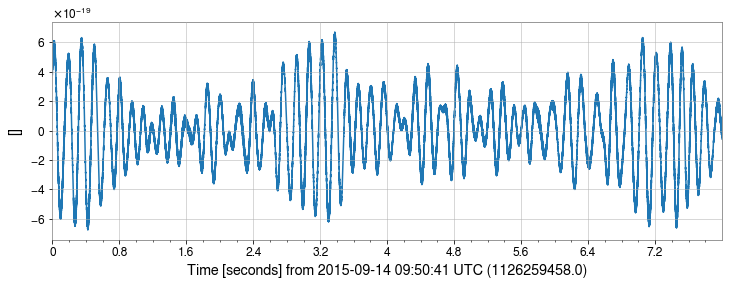

In [11]:
# Visualization of the Original Strain Data
# Duration of the data is 4s, i.e. a 2s interval around the merger

gps = event_gps("GW150914")
start = int(gps) - 4
end = int(gps) + 4
data = TimeSeries.fetch_open_data('H1', start, end)
data.plot()
print(data.sample_rate)

# Extra Noise Samples

In [ ]:
# Generate 24 noise samples

for i in tqdm(range(24)):
    # The color of the noise matches a PSD which you provide
    flow = 30.0
    delta_f = 1.0 / 16
    flen = int(2048 / delta_f) + 1
    psd = pycbc.psd.aLIGOZeroDetHighPower(flen, delta_f, flow)

    # Generate 4 seconds of noise at 4096 Hz
    delta_t = 1.0 / 4096
    tsamples = int(4 / delta_t)
    noise = pycbc.noise.noise_from_psd(tsamples, delta_t, psd)

    noise *= 1e21
    noise *= 0.4
    noise = TimeSeries.from_pycbc(noise)

    noise *= 1e-17
    noise.write(directory + "BBH mergers/Noise/noise_"+str(i)+".txt")
    

  0%|          | 0/24 [00:00<?, ?it/s]

In [ ]:
# Merging Noise Data Templates into single file

path = directory + "BBH mergers/Noise/"
files= os.listdir(path)
f = open(directory + 'BBH mergers/Noise.csv', 'w')
cw = csv.writer(f)

for i in tqdm(files):
    df = pd.read_csv(path+i,sep = ' ', header=None)
    c = df[:][1]
    cw.writerow(c)
f.close()

  0%|          | 0/24 [00:00<?, ?it/s]